In [1]:
import numpy as np 
import matplotlib.pyplot as plt


freq: 1
t_step, t_max 0.006666666666666667 4
f_step, f_max 0.25 150.0


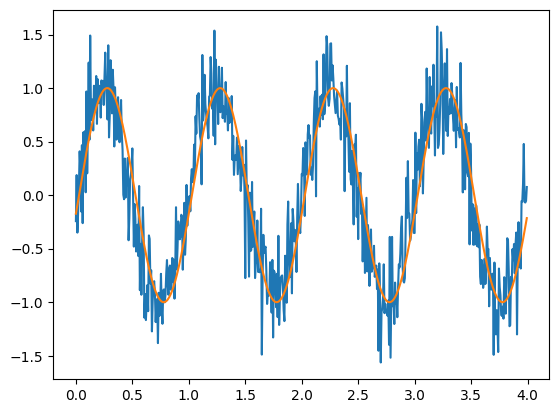

In [2]:
freq = 1 #3 / 60 # En Hz
phase = -10
N = 600 # nombre d'échantillons
t_max = 4 # tps max en secondes
t_step = t_max / N
f_max = 1 / t_step
f_step = 1 / t_max

print("freq:", freq)
print("t_step, t_max", t_step, t_max)
print("f_step, f_max", f_step, f_max)

time = np.arange(0, t_max, t_step)
signal = np.sin( 2*np.pi*freq*time )
dephase = np.sin( 2*np.pi*freq*time + phase*np.pi/180  )

rng = np.random.default_rng()
noise_power = 0.001 * f_max / 2
signal += rng.normal(scale=np.sqrt(noise_power), size=time.shape)

plt.plot(time, signal)
plt.plot(time, dephase)

0.25


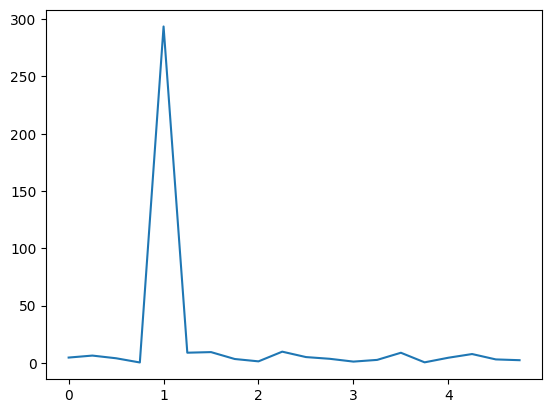

In [3]:
freqs = np.arange(0, f_max, f_step)
sp = np.fft.fft(signal)
sp_d = np.fft.fft(dephase)


N_f = sp.shape[0] // 2
N_f = 20

plt.plot(freqs[:N_f], abs(sp[:N_f]))
#plt.plot(freqs[:N_f], abs(sp_d[:N_f]))

print(freqs[1]-freqs[0])

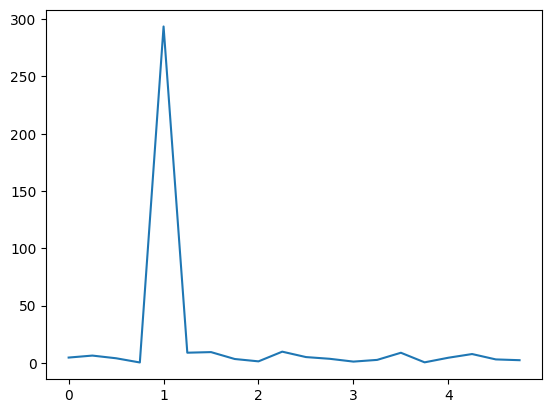

In [12]:
real_part = np.real(sp)
imag_part = np.imag(sp)
magnitude = np.sqrt(real_part**2 + imag_part**2)
plt.plot(freqs[:N_f], magnitude[:N_f])

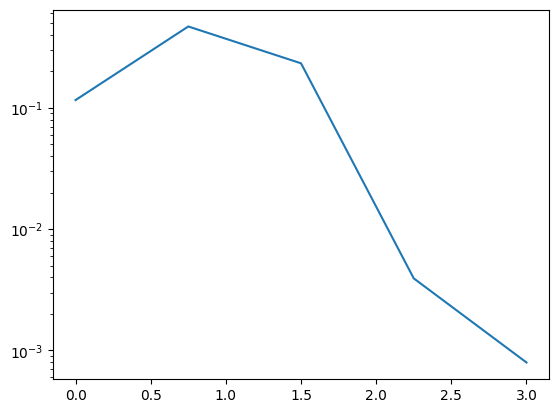

In [5]:
from scipy.signal import welch

frequencies, power_spectrum = welch(signal, fs=f_max, nperseg=200)
plt.semilogy(frequencies[:5], power_spectrum[:5]) 



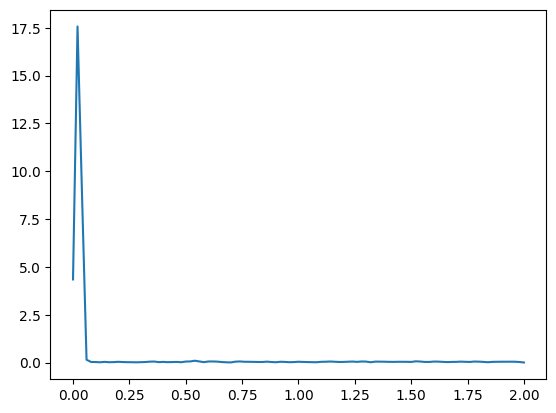

In [6]:
from iapytoo.predictions.plotters import DSPPlotter
from iapytoo.predictions import Predictions
dsp_plotter = DSPPlotter()
predictions = Predictions(loader=None)
predictions.predicted.append(signal)
dsp_plotter.predictions = predictions

result = dsp_plotter.plot(epoch=0)
dsp_fig = result['dsp']
dsp_fig.show()